In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
sns.set_style("white")

##  DIMENSOES E DADOS DE CARGA DO CAIXÃO ANALISADO 

In [3]:
# ---------- Conversões ----------
lbf_to_N = 4.448
fts_to_mih = 1/1.467

In [4]:
# ---------- Número USP e Delta ----------
n_usp = "10788662"
A = int(n_usp[-2:])
delta = 0.004 * A + 0.8

In [5]:
#---------- Dimensoes Caixão ----------
C = 600 * delta # [mm]
L = 300 * delta # [mm]
H1 = 150 * delta # [mm]
H2 = 120 * delta # [mm]

#Perfil 1
W_1 = 15 * delta # [mm]
H_1 = 15 * delta # [mm]
t_1 = 1 * delta # [mm]
W1_1 = 5 * delta # [mm]

#Perfil 2
W_2 = 15 * delta # [mm]
H_2 = 10 * delta # [mm]
t1_2 = 1 * delta # [mm]
t2_2 = 1 * delta # [mm]

In [6]:
# ---------- Materiais ----------

# Material 1 - Al 7475-T6 
# Usado para os perfis

E_1 = 7.2 * 10**(10) #[N/m]
nu_1 = 0.32


# Material 2 - Al 2024-T3
# Usado para revestimento, alma da longarina e alma da nervura
revestimento = 1.5 * delta # [mm]
alma_longarina = 1.5 * delta # [mm]
alma_nervura = 1.5 * delta # [mm]

E_2 = 6.9 * 10**(10) #[N/m]
nu_2 = 0.33 

# Dados de Carga

In [7]:
#---------- Dados de Carga ----------

rho = 0.00256 # [slug/ft^3]

Vd = 400 # [mi/h]
Vc = 200 # [mi/h]

n_max = 6
n_min = -1.5

W = 900 * delta # [lbf]
S = 30 * delta # [ft^2]

## Diagrama V-n

### Curva $Cz_{\alpha}$

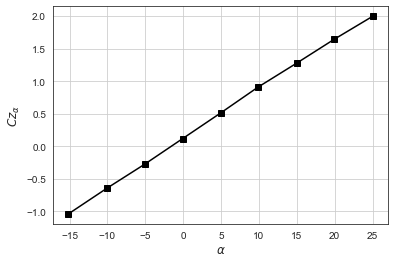

In [8]:
## Diagrama V-n
cz_alpha = pd.read_csv('cz_alpha.txt', delimiter = ";")

fig_cz_alpha, ax_cz_alpha = plt.subplots(figsize=(6,4))
ax_cz_alpha.plot(cz_alpha['Alpha'], cz_alpha['Cz'], color = 'k' , marker = 's')
ax_cz_alpha.set_xlabel("$\\alpha$", fontsize = 12)
ax_cz_alpha.set_ylabel("$Cz_{\\alpha}$", fontsize = 12)
ax_cz_alpha.grid()
#plt.savefig("cz_alpha.pdf")

In [9]:
V = sp.Symbol('V')

Cza_max = max(cz_alpha['Cz'])
Cza_min = min(cz_alpha['Cz'])

alpha_max = float(cz_alpha[cz_alpha['Cz'] == Cza_max].Alpha)
alpha_min = float(cz_alpha[cz_alpha['Cz'] == Cza_min].Alpha)

### Diagrama V-n: manobra

In [10]:
n_OA = Cza_max * ((rho * S * (V / fts_to_mih)**2)/(2 * W)) 
V_A = float(sp.solve(n_OA - n_max)[1])

n_OB = Cza_min * ((rho * S * (V / fts_to_mih)**2)/(2 * W)) 
V_B = float(sp.solve(n_OB - n_min)[1])

In [11]:
range_OA = np.linspace(0, V_A,1000)
nyOA = [n_OA.subs(V, i) for i in range_OA]
range_max_sup = np.linspace(V_A, Vd,1000)

range_OB = np.linspace(0, V_B, 1000)
nyOB = [n_OB.subs(V, i) for i in range_OB]
range_min_inf = np.linspace(V_B, Vd,1000)

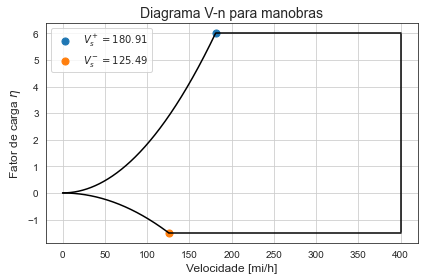

In [12]:
fig_vn_manobra, ax_vn_manobra = plt.subplots(figsize=(6,4))

ax_vn_manobra.plot(range_OA, nyOA, color = 'k')
ax_vn_manobra.plot(range_OB, nyOB, color = 'k')

ax_vn_manobra.plot(range_max_sup, n_max * np.ones(len(range_max_sup)), color = 'k')
ax_vn_manobra.plot(range_min_inf, n_min * np.ones(len(range_min_inf)), color = 'k')

ax_vn_manobra.scatter(V_A, n_max, marker = 'o', s = 50, label = "$V_s^+ = {}$".format(round(V_A,2)))
ax_vn_manobra.scatter(V_B, n_min, marker = 'o', s = 50, label = "$V_s^- = {}$".format(round(V_B,2)))

ax_vn_manobra.axvline(Vd, ymin = 0.05, ymax = 0.95, color = 'k')


ax_vn_manobra.set_xlabel("Velocidade [mi/h]", fontsize = 12)
ax_vn_manobra.set_ylabel("Fator de carga $\\eta$", fontsize = 12)
ax_vn_manobra.set_title("Diagrama V-n para manobras", fontsize = 14)
ax_vn_manobra.grid()
ax_vn_manobra.legend()
plt.tight_layout()
plt.savefig("diagrama_vn_manobra.pdf")
plt.show()

### Diagrama V-n: rajada

In [13]:
beta = (Cza_max - Cza_min) / (alpha_max - alpha_min)
corr = 0.5 * 1.47 * rho * 180/np.pi

V_stall_sup = 50 # [ft/s]
V_stall_inf = -50 # [ft/s]
V_mergulho = 20 # [ft/s]
V_cruzeiro = 40 # [ft/s]

In [14]:
delta_n_mergulho = (corr * beta * V_mergulho * V)/(W/S)
delta_n_cruzeiro = (corr * beta * V_cruzeiro * V)/(W/S)
delta_n_stall_sup = (corr * beta * V_stall_sup * V)/(W/S)
delta_n_stall_inf = (corr * beta * V_stall_inf * V)/(W/S)

In [15]:
range_delta_n_mergulho = np.linspace(0, Vd, 1000)
pos_ny_delta_n_mergulho = [1 + delta_n_mergulho.subs(V,i) for i in range_delta_n_mergulho]
neg_ny_delta_n_mergulho = [- 1* delta_n_mergulho.subs(V,i) for i in range_delta_n_mergulho]


range_delta_n_cruzeiro = np.linspace(0, Vc, 1000)
pos_ny_delta_n_cruzeiro = [1 + delta_n_cruzeiro.subs(V,i) for i in range_delta_n_cruzeiro]
neg_ny_delta_n_cruzeiro = [-1 * delta_n_cruzeiro.subs(V,i) for i in range_delta_n_cruzeiro]

range_delta_n_stall_sup = np.linspace(0, float(V_A), 1000)
pos_ny_delta_n_stall_sup = [1 + delta_n_stall_sup.subs(V,i) for i in range_delta_n_stall_sup]
#neg_ny_delta_n_stall_sup = [-1*delta_n_stall_sup.subs(V,i) for i in range_delta_n_stall_sup]

range_delta_n_stall_inf = np.linspace(0, float(V_B), 1000)
#pos_ny_delta_n_stall_inf = [1 + delta_n_stall_inf.subs(V,i) for i in range_delta_n_stall_inf]
neg_ny_delta_n_stall_inf = [delta_n_stall_inf.subs(V,i) for i in range_delta_n_stall_inf]

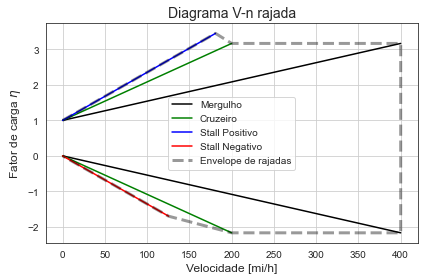

In [16]:
fig_vn_rajada, ax_vn_rajada = plt.subplots(figsize=(6,4))

ax_vn_rajada.plot(range_delta_n_mergulho, pos_ny_delta_n_mergulho, color = 'k', ls = '-', label = "Mergulho")
ax_vn_rajada.plot(range_delta_n_mergulho, neg_ny_delta_n_mergulho, color = 'k', ls = '-')

ax_vn_rajada.plot(range_delta_n_cruzeiro, pos_ny_delta_n_cruzeiro, color = 'green', ls = '-', label = "Cruzeiro")
ax_vn_rajada.plot(range_delta_n_cruzeiro, neg_ny_delta_n_cruzeiro, color= 'green', ls = '-')

ax_vn_rajada.plot(range_delta_n_stall_sup, pos_ny_delta_n_stall_sup, color = 'blue', ls = '-', label = "Stall Positivo")

ax_vn_rajada.plot(range_delta_n_stall_inf, neg_ny_delta_n_stall_inf, color = 'r', label = "Stall Negativo", ls = '-')

v_join = [0, V_A, Vc, Vd, Vd, Vc, V_B, 0]
n_join = [1, max(pos_ny_delta_n_stall_sup), 
          max(pos_ny_delta_n_cruzeiro),
          max(pos_ny_delta_n_mergulho),
          min(neg_ny_delta_n_mergulho),
          min(neg_ny_delta_n_cruzeiro),
          min(neg_ny_delta_n_stall_inf),
          0]

ax_vn_rajada.plot(v_join, n_join, lw = 3, color = 'k', alpha = 0.4, label = "Envelope de rajadas",
                 ls = '--')
          
ax_vn_rajada.set_xlabel("Velocidade [mi/h]", fontsize = 12)
ax_vn_rajada.set_ylabel("Fator de carga $\eta$", fontsize = 12)
ax_vn_rajada.legend()
ax_vn_rajada.set_title("Diagrama V-n rajada", fontsize = 14)


ax_vn_rajada.grid()
plt.tight_layout()
plt.savefig("diagrama_vn_rajada.pdf")
plt.show()

### Diagrama V-n completo

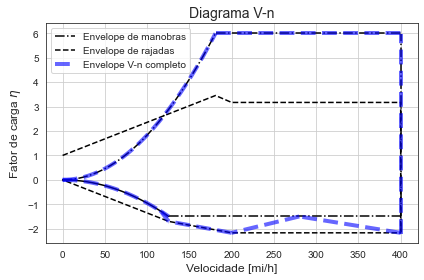

In [17]:
fig_vn, ax_vn = plt.subplots(figsize=(6,4))

#Manobras
ax_vn.plot(range_OA, nyOA, color = 'k', label = "Envelope de manobras", ls = '-.')
ax_vn.plot(range_OB, nyOB, color = 'k')
ax_vn.plot(range_max_sup, n_max * np.ones(len(range_max_sup)), color = 'k', ls = '-.')
ax_vn.plot(range_min_inf, n_min * np.ones(len(range_min_inf)), color = 'k', ls = '-.')
ax_vn.axvline(Vd, ymin = 0.05, ymax = 0.95, color = 'k', ls = '-.')


#Rajadas
ax_vn.plot(v_join, n_join, 
        color = 'k', alpha = 1, label = "Envelope de rajadas",
                 ls = '--')

#Completo
ax_vn.plot(range_OA, nyOA, color = 'b', lw = 4, alpha = 0.6, ls = '--', label = "Envelope V-n completo")
ax_vn.plot(range_OB, nyOB, color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.plot(range_max_sup, n_max * np.ones(len(range_max_sup)), color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.axvline(Vd, ymin = 0.04, ymax = 0.95, color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.plot([Vd, 280], [min(neg_ny_delta_n_mergulho), -1.5], color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.plot([280, Vc], [-1.5, min(neg_ny_delta_n_cruzeiro)], color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.plot([Vc, V_B], [min(neg_ny_delta_n_cruzeiro), min(neg_ny_delta_n_stall_inf)], color = 'b', lw = 4, alpha = 0.6, ls = '--')
ax_vn.plot([V_B, V_B-10], [min(neg_ny_delta_n_stall_inf), min(neg_ny_delta_n_stall_inf) + 0.45], color = 'b', lw = 4, alpha = 0.6, ls = '--')


ax_vn.set_xlabel("Velocidade [mi/h]", fontsize = 12)
ax_vn.set_ylabel("Fator de carga $\eta$", fontsize = 12)
ax_vn.grid()
ax_vn.legend()
plt.title("Diagrama V-n", fontsize = 14)
plt.tight_layout()
plt.savefig("diagrama_vn_completo.pdf")
plt.show()

In [18]:
nz_max = 6
W_semi_asa = 1000 * delta # [N]
F = 91000* delta - (nz_max - W_semi_asa)

F1 = 0.75 * F # [N]
F2 = 0.25 * F # [N]
F3 = 0.1 * F # [N]
F4 = 0.15 * F # [N]